# If you take the blue states out
Based on Trump asserting that the US Covid response would look much better [if the blue states were not included](https://www.washingtonpost.com/politics/2020/09/16/trump-blames-blue-states-coronavirus-death-toll-but-most-recent-deaths-have-been-red-states/).

In [263]:
import pandas as pd
pd.options.display.max_rows = 100
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

## Red vs Blue States

In [280]:
# read in the 2016 presidential election results
vote2016 = pd.read_csv('us-2016-presidential-election-by-states.csv').set_index('State')
vote2016['Color'] = vote2016['Winner'].apply(lambda x: 'red' if x == 'Republican' else 'blue')
vote2016.head()

,Democratic,Libertarian,Republican,Winner,Color
State,,,,,
South Dakota,31.737428,5.633719,61.530750,Republican,red
Montana,35.412756,5.587041,55.645229,Republican,red
Washington,52.539044,4.850142,36.832936,Democratic,blue
Connecticut,54.566301,2.959171,40.926914,Democratic,blue
Kansas,35.739963,4.637436,56.163649,Republican,red


In [281]:
# read in state populations
# (source: https://worldpopulationreview.com/states/states-by-area/)
state_populations = pd.read_csv('state population and area.csv')
state_populations.head()

,State,TotalArea,LandArea,WaterArea,Density,Pop
0,Alaska,665384,570641,94743,1.2863,734002
1,Texas,268596,261232,7365,112.8204,29472295
2,California,163696,155779,7916,256.3727,39937489
3,Montana,147040,145546,1494,7.4668,1086759
4,New Mexico,121590,121298,292,17.2850,2096640


In [282]:
state_populations = state_populations.merge(vote2016,left_on='State',right_on='State')

In [283]:
state_populations.head()

,State,TotalArea,LandArea,WaterArea,Density,Pop,Democratic,Libertarian,Republican,Winner,Color
0,Alaska,665384,570641,94743,1.2863,734002,36.550871,5.877128,51.281512,Republican,red
1,Texas,268596,261232,7365,112.8204,29472295,43.235258,3.160719,52.234686,Republican,red
2,California,163696,155779,7916,256.3727,39937489,61.482366,3.360752,31.492109,Democratic,blue
3,Montana,147040,145546,1494,7.4668,1086759,35.412756,5.587041,55.645229,Republican,red
4,New Mexico,121590,121298,292,17.2850,2096640,48.255647,9.337245,40.042514,Democratic,blue


In [284]:
pop_x_color = pd.DataFrame(state_populations.groupby('Color').Pop.sum())
pop_x_color

,Pop
Color,
blue,142621417
red,188697575


In [287]:
# Read in the state level cases/deaths data from the NYT
# Note that cases and deaths here are cumulative, not daily
states = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [288]:
# merge in the political and population data
states = states.merge(vote2016,left_on='state',right_index=True)
states = states.merge(pop_x_color,left_on='Color',right_index=True)\
    [['date','state','cases','deaths','Color','Pop']]
states.head()

,date,state,cases,deaths,Color,Pop
0,2020-01-21,Washington,1,0,blue,142621417
1,2020-01-22,Washington,1,0,blue,142621417
2,2020-01-23,Washington,1,0,blue,142621417
4,2020-01-24,Washington,1,0,blue,142621417
7,2020-01-25,Washington,1,0,blue,142621417


In [289]:
day_x_color = states.groupby(['date','Color']).agg({'cases': sum, 'deaths': sum, 'Pop': max}).reset_index()
day_x_color

,date,Color,cases,deaths,Pop
0,2020-01-21,blue,1,0,142621417
1,2020-01-22,blue,1,0,142621417
2,2020-01-23,blue,1,0,142621417
3,2020-01-24,blue,2,0,142621417
4,2020-01-25,blue,3,0,142621417
...,...,...,...,...,...
470,2020-09-14,red,3976922,89929,188697575
471,2020-09-15,blue,2565907,104260,142621417
472,2020-09-15,red,4005805,90822,188697575
473,2020-09-16,blue,2576603,104535,142621417


In [290]:
# convert date to datetime and compute per capita metrics
day_x_color['date'] = pd.to_datetime(day_x_color['date'])
day_x_color['cir'] = 1e3*day_x_color['cases']/day_x_color['Pop']
day_x_color['pmr'] = 1e6*day_x_color['deaths']/day_x_color['Pop']

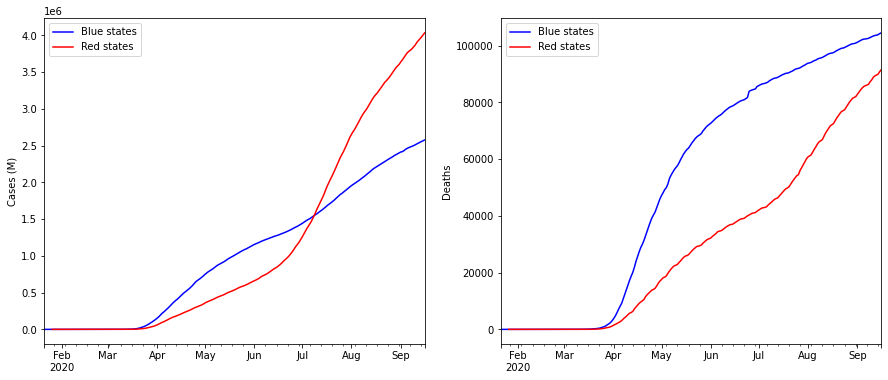

In [291]:
# Plot cumulative totals
fig, ax = plt.subplots(1,2,figsize=(15,6))
day_x_color.loc[day_x_color.Color=='blue'].plot(x='date',y='cases',color='blue',ax=ax[0],label='Blue states')
day_x_color.loc[day_x_color.Color=='red'].plot(x='date',y='cases',color='red',ax=ax[0],label='Red states')
ax[0].set_ylabel('Cases (M)')
ax[0].set_xlabel('')
day_x_color.loc[day_x_color.Color=='blue'].plot(x='date',y='deaths',color='blue',ax=ax[1],label='Blue states')
day_x_color.loc[day_x_color.Color=='red'].plot(x='date',y='deaths',color='red',ax=ax[1],label='Red states')
ax[1].set_ylabel('Deaths')
ax[1].set_xlabel('');

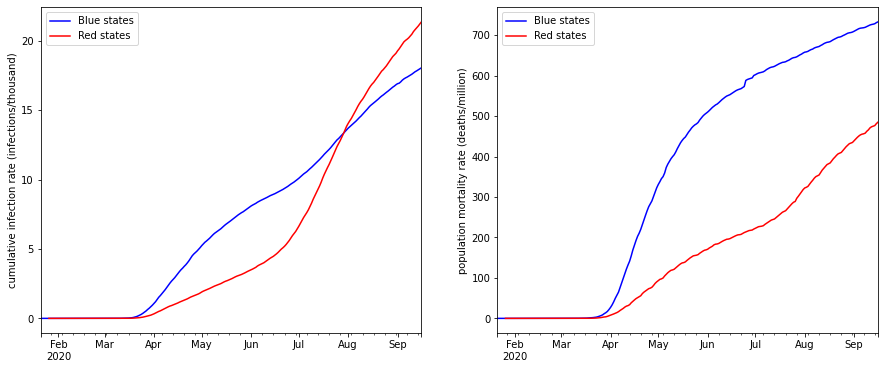

In [292]:
# plot per capita metrics
fig, ax = plt.subplots(1,2,figsize=(15,6))
day_x_color.loc[day_x_color.Color=='blue'].plot(x='date',y='cir',color='blue',ax=ax[0],label='Blue states')
day_x_color.loc[day_x_color.Color=='red'].plot(x='date',y='cir',color='red',ax=ax[0],label='Red states')
ax[0].set_ylabel('cumulative infection rate (infections/thousand)')
ax[0].set_xlabel('')
day_x_color.loc[day_x_color.Color=='blue'].plot(x='date',y='pmr',color='blue',ax=ax[1],label='Blue states')
day_x_color.loc[day_x_color.Color=='red'].plot(x='date',y='pmr',color='red',ax=ax[1],label='Red states')
ax[1].set_ylabel('population mortality rate (deaths/million)')
ax[1].set_xlabel('');

In [293]:
# look at the current aggregate metrics
day_x_color.tail(2)

,date,Color,cases,deaths,Pop,cir,pmr
473,2020-09-16,blue,2576603,104535,142621417,18.066031,732.954434
474,2020-09-16,red,4034166,91525,188697575,21.379003,485.035380


## Europe

In [294]:
# get cases and deaths by country for the entire world
# Note that these are daily numbers, not cumulative sums
world = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

# Recode 'United_Kingdom' as 'United Kingdom' for later matching
world.loc[world.geoId == 'UK','countriesAndTerritories'] = 'United Kingdom'

# convert date column from text to datetime
world['date'] = pd.to_datetime(world.dateRep)

# relabel
world.rename(columns={'countriesAndTerritories': 'country'},inplace=True)
world = world[['date','country','cases','deaths']]
world = world.loc[world.date < dt.datetime.now()]
world.head()

,date,country,cases,deaths
0,2020-09-17,Afghanistan,17,0
1,2020-09-16,Afghanistan,40,10
2,2020-09-15,Afghanistan,99,6
3,2020-09-14,Afghanistan,75,0
4,2020-09-13,Afghanistan,35,0


In [295]:
# read in the list of countries in Europe
# this will give us many irrelevant columns but we really just want the names and populations
europe = pd.read_csv('https://raw.githubusercontent.com/ajturner/acetate/master/places/Countries-Europe.csv')
europe.rename(columns={'name': 'country'},inplace=True)
europe.head()

,zoom,country,abbreviation,ISO alpha 2,ISO alpha 3,ISO numeric,land area km,population,latitude,longitude,continent
0,3,Ukraine,Ukr.,UA,UKR,804,603700.0,45415596,49.0,32.0,eu
1,3,France,Fr.,FR,FRA,250,547030.0,64768389,46.0,2.0,eu
2,3,Spain,Spain,ES,ESP,724,504782.0,46505963,40.0,-4.0,eu
3,3,Sweden,Swe.,SE,SWE,752,449964.0,9045000,62.0,15.0,eu
4,3,Germany,Ger.,DE,DEU,276,357021.0,82369000,51.5,10.5,eu


In [296]:
eu_pop = europe.population.sum()

In [297]:
europe = world.merge(europe['country'],how='inner')
europe.head()

,date,country,cases,deaths
0,2020-09-17,Albania,144,3
1,2020-09-16,Albania,152,2
2,2020-09-15,Albania,167,4
3,2020-09-14,Albania,168,4
4,2020-09-13,Albania,164,3


In [269]:
eu_x_day = europe.groupby('date').sum()
eu_x_day['cases'] = eu_x_day['cases'].cumsum()
eu_x_day['deaths'] = eu_x_day['deaths'].cumsum()
eu_x_day.reset_index(inplace=True)
eu_x_day.tail()

,date,cases,deaths
230,2020-09-13,2581937,172403
231,2020-09-14,2631828,172693
232,2020-09-15,2663473,173048
233,2020-09-16,2704068,173645
234,2020-09-17,2731283,173854


In [298]:
# compute per capita metrics
eu_x_day['Pop'] = eu_pop
eu_x_day['cir'] = 1e3*eu_x_day['cases']/eu_x_day['Pop']
eu_x_day['pmr'] = 1e6*eu_x_day['deaths']/eu_x_day['Pop']

In [299]:
# look at current metrics
eu_x_day.tail(1)

,date,cases,deaths,Pop,cir,pmr
234,2020-09-17,2731283,173854,594702871,4.592685,292.337583


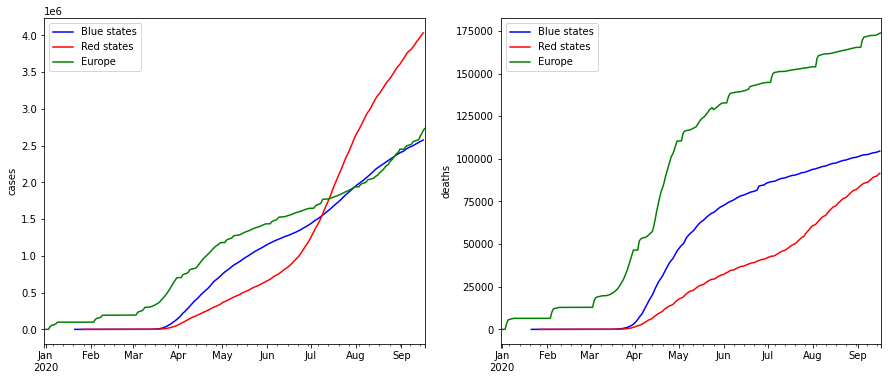

In [300]:
# plot cumulative sums for red, blue, and Europe
fig, ax = plt.subplots(1,2,figsize=(15,6))
day_x_color.loc[day_x_color.Color=='blue'].plot(x='date',y='cases',color='blue',ax=ax[0],label='Blue states')
day_x_color.loc[day_x_color.Color=='red'].plot(x='date',y='cases',color='red',ax=ax[0],label='Red states')
eu_x_day.plot(x='date',y='cases',color='green',ax=ax[0],label='Europe')
ax[0].set_ylabel('cases')
ax[0].set_xlabel('')
day_x_color.loc[day_x_color.Color=='blue'].plot(x='date',y='deaths',color='blue',ax=ax[1],label='Blue states')
day_x_color.loc[day_x_color.Color=='red'].plot(x='date',y='deaths',color='red',ax=ax[1],label='Red states')
eu_x_day.plot(x='date',y='deaths',color='green',ax=ax[1],label='Europe')
ax[1].set_ylabel('deaths')
ax[1].set_xlabel('');

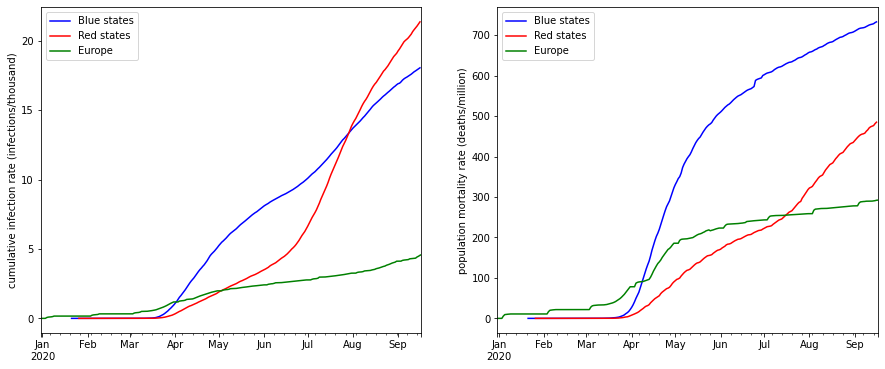

In [301]:
# plot per capita metrics for blue, red, and Europe
fig, ax = plt.subplots(1,2,figsize=(15,6))
day_x_color.loc[day_x_color.Color=='blue'].plot(x='date',y='cir',color='blue',ax=ax[0],label='Blue states')
day_x_color.loc[day_x_color.Color=='red'].plot(x='date',y='cir',color='red',ax=ax[0],label='Red states')
eu_x_day.plot(x='date',y='cir',color='green',ax=ax[0],label='Europe')
ax[0].set_ylabel('cumulative infection rate (infections/thousand)')
ax[0].set_xlabel('')
day_x_color.loc[day_x_color.Color=='blue'].plot(x='date',y='pmr',color='blue',ax=ax[1],label='Blue states')
day_x_color.loc[day_x_color.Color=='red'].plot(x='date',y='pmr',color='red',ax=ax[1],label='Red states')
eu_x_day.plot(x='date',y='pmr',color='green',ax=ax[1],label='Europe')
ax[1].set_ylabel('population mortality rate (deaths/million)')
ax[1].set_xlabel('');